# 損失関数
<dl>
    <dt>2乗和誤差</dt>
    <dd>誤差を二乗したものの合計。</dd>
    <dt>交差エントロピー誤差</dt>
    <dd>実際の公式は本のものとは違う　下にリンク貼っとく</dd>
   </dl>

[交差エントロピーについての参考文献](http://yaju3d.hatenablog.jp/entry/2018/11/30/225841)

### ライブラリインポート用セル

In [4]:
import numpy as np
import sys, os
os.chdir('/users/isonoyuma/deep-learning-from-scratch/ch03')#カレントディレクトリ変更モジュール os.chdir
sys.path.append(os.pardir)#親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

import matplotlib.pylab as plt


from mpl_toolkits.mplot3d import Axes3D#三次元プロット用のライブラリ

## 2乗和誤差

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
'''
ニューラルネットワークのソフトマックス関数の出力
（この場合は0.6が一番大きいので、そのインデックスの2がニューラルネットワークとしての答えとなる。)
（ソフトマックス関数からの出力なので、確率として扱うことっもできる。）
'''

t = [0,0,1,0,0,0,0,0,0,0]#one-hot表現による正解のラベル。

In [12]:
def mean_squared_error(y, t):#2乗和誤差の実装
    return 0.5 * np.sum((y-t)**2)

先程のデータを使ってみる。

In [13]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

データを変えてみる。
出力で、「７」が一番大きくなるようにした。

In [27]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(np.argmax(y2))

mean_squared_error(np.array(y2), np.array(t))

7


0.5975

期待通り、誤差が広がったことがわかる。
よって、一つ目の方が教師データに適していることがわかる。

## 交差エントロピー誤差

In [28]:
def cross_entropy_error(y, t):#交差エントロピー誤差の実装
    delta = 1e-7#np.log(0)をしたときのマイナス無限大対策
    return -np.sum(t * np.log(y + delta))

これもさっきの二つのデータを使ってやってみる。

In [30]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [31]:
cross_entropy_error(np.array(y2), np.array(t))

2.302584092994546

同じく誤差が大きくなったため、これまでの議論と一致していることがわかる。

ニューラルネットワークにおける学習とは、訓練データに対する損失関数を求め、その値をできるだけ小さくするようなパラメータ（重みやバイアス）を探し出すということ。

### ミニバッチ学習

今やってるMNISTのデータセットのデータは６０,０００個もデータがあるが、とても時間がかかるため、現実的ではない。そのため、その中からある枚数だけ取り出し、学習することをミニバッチ学種という。

In [38]:
(x_train, t_train),(x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [34]:
#ランダムで取り出す処理
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### バッチ対応版交差エントロピー

In [39]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))/batch_size

one-hotではなく、普通にラベルが与えられるときの実装

In [43]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arrange(batch_size),t] + 1e-7))/batch_size

一つのパラメータに注目
このパラメータに対する損失関数の微分は、その重みパラメータの値を少しだけ変化させた時に損失関数がどのように変化するかを表す。

微分した値がマイナスなら、重みを正方向に動かせば、損失関数を減少、
また微分の値がプラスなら、負の方向に動かせば損失関数を減少させる。
微分の値がゼロになれば、そこで重みをストップさせる。

## 中心差分を用いた微分の実装

In [12]:
def numerical_diff(f,x):
    h = 1e-4 #丸め込み誤差が起きないギリギリの小ささ
    return (f(x+h) - f(x-h)) / (2*h)

## 数値微分の例

In [45]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

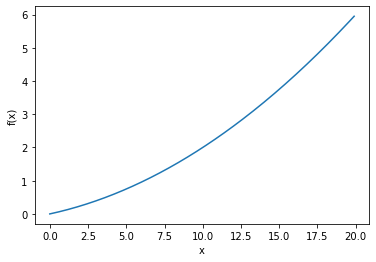

In [47]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [48]:
numerical_diff(function_1, 5)

0.1999999999990898

In [49]:
numerical_diff(function_1, 10)

0.2999999999986347

## 偏微分(変数が2個ある場合の微分)

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2

### グラフ化
[参考資料](https://qiita.com/orange_u/items/8a1e285a45093857aef7)

In [23]:
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

X, Y = np.meshgrid(x,y)
Z = function_2(X, Y)

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_wireframe(X, Y, Z)
plt.show()

TypeError: function_2() takes 1 positional argument but 2 were given

### x = 3, y = 4のときのxに対する偏微分の求め方

In [11]:
def function_tmp1 (x):
    return x * x + 4.0 ** 2.0

In [13]:
numerical_diff(function_tmp1, 3)

6.00000000000378

<p>ちなみに解析的微分だと答えは６</p>

### x = 3, y = 4のときのyに対する偏微分の求め方

In [14]:
def function_tmp2(y):
    return 3.0 ** 2.0 + y * y

In [15]:
numerical_diff(function_tmp2, 4)

7.999999999999119

<p>ちなみに解析的微分だと答えは8</p>

## 勾配(gradient)関数のどの変数に対しても偏積分して、それをベクトルにまとめる）

In [18]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for ind in range(x.size):
        #f(x + h)
        tmp_val = x[ind]
        x[ind] = tmp_val + h
        fxh1 = f(x)
        #f(x - h)
        x[ind] = tmp_val - h
        fxh2 = f(x)
        grad[ind] = (fxh1 - fxh2) / (2*h)
        x[ind] = tmp_val
    return grad

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

## 勾配法による関数の最小値の求め方

In [25]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    '''
    f:function
    init_x:first input parameter
    lr:learning rate
    step_num:num of learning 
    '''
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

学習効率は大きすぎると、更新されるときの幅が大きくなり、大きな値へ発散してしまい、逆に小さすぎると、ほとんど値が更新されなくなり、性能が落ちてしまう

学習効率の値のような、我々が前もって決める値のことを、ハイパーパラメータというが、これを少しずつ変えていくことによって、最適な値を見つけていくことが必要。